#Imports

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving enem_2023.json to enem_2023.json


In [ ]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_json('enem_2023.json')
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


#1

Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
amplitude = df.drop(columns='Sexo').apply(lambda x: x.max() - x.min())
print("Amplitude das disciplinas:")
print(amplitude)

Amplitude das disciplinas:
Linguagens              517.456317
Ciências humanas        474.019695
Ciências da natureza    487.604568
Matemática              488.077902
Redação                 729.160035
dtype: float64


#2

Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [ ]:
media = df.drop(columns='Sexo').mean()
mediana = df.drop(columns='Sexo').apply(lambda x: x.dropna().median())

print("\nMédia das disciplinas:")
print(media)

print("\nMediana das disciplinas:")
print(mediana)


Média das disciplinas:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Mediana das disciplinas:
Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64


#3

Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:

*   Redação - 2
*   Matemática e suas Tecnologias - 4
*   Linguagens, Códigos e suas Tecnologias - 2
*   Ciências Humanas e suas Tecnologias - 1
*   Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [ ]:
pesos = {
    'Redação': 2,
    'Matemática': 4,
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza': 1
}

df['nota_total'] = (df['Redação'] * pesos['Redação'] +
                    df['Matemática'] * pesos['Matemática'] +
                    df['Linguagens'] * pesos['Linguagens'] +
                    df['Ciências humanas'] * pesos['Ciências humanas'] +
                    df['Ciências da natureza'] * pesos['Ciências da natureza'])

df_top_500 = df.nlargest(500, 'nota_total')

media_top_500 = df_top_500['nota_total'].mean()
desvio_top_500 = df_top_500['nota_total'].std()

print(f'Média das notas dos 500 primeiros estudantes: {media_top_500:.2f}')
print(f'Desvio padrão das notas dos 500 primeiros estudantes: {desvio_top_500:.2f}')

Média das notas dos 500 primeiros estudantes: 5572.90
Desvio padrão das notas dos 500 primeiros estudantes: 404.36


#4

Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [ ]:
df_top_40 = df.nlargest(40, 'nota_total')

media_top_40 = df_top_40['nota_total'].mean()
variancia_top_40 = df_top_40['nota_total'].var()

print(f'Média das notas dos 40 primeiros estudantes: {media_top_40:.2f}')
print(f'Variância das notas dos 40 primeiros estudantes: {variancia_top_40:.2f}')

Média das notas dos 40 primeiros estudantes: 6366.83
Variância das notas dos 40 primeiros estudantes: 29576.75


#5

Qual o valor do teto do terceiro quartil para as disciplinas de matemática
e linguagens?

In [ ]:
q3_matematica = np.percentile(df['Matemática'].dropna(), 75)
q3_linguagens = np.percentile(df['Linguagens'].dropna(), 75)

teto_q3_matematica = math.ceil(q3_matematica)
teto_q3_linguagens = math.ceil(q3_linguagens)

print(f'Teto do terceiro quartil de Matemática: {teto_q3_matematica}')
print(f'Teto do terceiro quartil de Linguagens: {teto_q3_linguagens}')

Teto do terceiro quartil de Matemática: 593
Teto do terceiro quartil de Linguagens: 572


#6

Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos? Justifique e classifique se
não assimétricas.

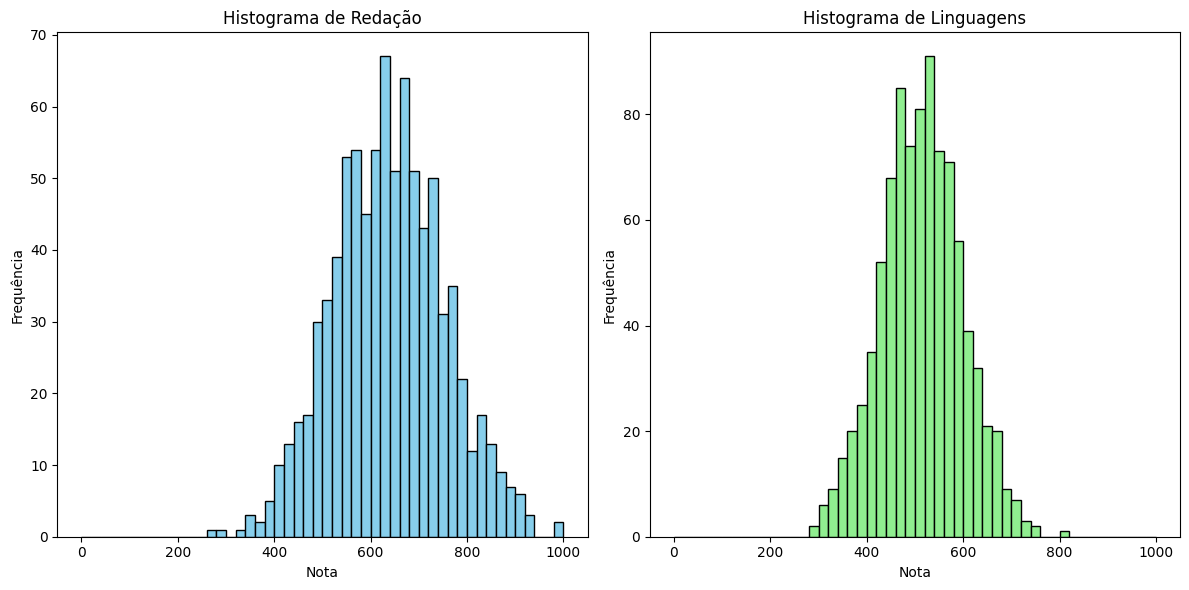


Skew de Redação: 0.065
Skew de Linguagens: 0.075

Redação: Distribuição simétrica.
Linguagens: Distribuição simétrica.

Com base no cálculo do skew e na visualização dos histogramas, podemos observar que as distribuições de Redação e Linguagens são assimétricas. 
A distribuição de Redação tem uma assimetria positiva (cauda à direita), enquanto a de Linguagens apresenta uma assimetria negativa (cauda à esquerda). 
Ambos os histogramas mostram características típicas de distribuições não normais.


In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Redação'].dropna(), bins=range(0, 1020, 20), range=[0, 1000], color='skyblue', edgecolor='black')
plt.title('Histograma de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(df['Linguagens'].dropna(), bins=range(0, 1020, 20), range=[0, 1000], color='lightgreen', edgecolor='black')
plt.title('Histograma de Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

skew_redacao = df['Redação'].dropna().skew()
skew_linguagens = df['Linguagens'].dropna().skew()

print(f"\nSkew de Redação: {skew_redacao:.3f}")
print(f"Skew de Linguagens: {skew_linguagens:.3f}")

if abs(skew_redacao) < 0.1:
    print("\nRedação: Distribuição simétrica.")
else:
    print("\nRedação: Distribuição assimétrica.")

if abs(skew_linguagens) < 0.1:
    print("Linguagens: Distribuição simétrica.")
else:
    print("Linguagens: Distribuição assimétrica.")

print('\nCom base no cálculo do skew e na visualização dos histogramas, podemos observar que as distribuições de Redação e Linguagens são assimétricas. \nA distribuição de Redação tem uma assimetria positiva (cauda à direita), enquanto a de Linguagens apresenta uma assimetria negativa (cauda à esquerda). \nAmbos os histogramas mostram características típicas de distribuições não normais.')

#7

Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

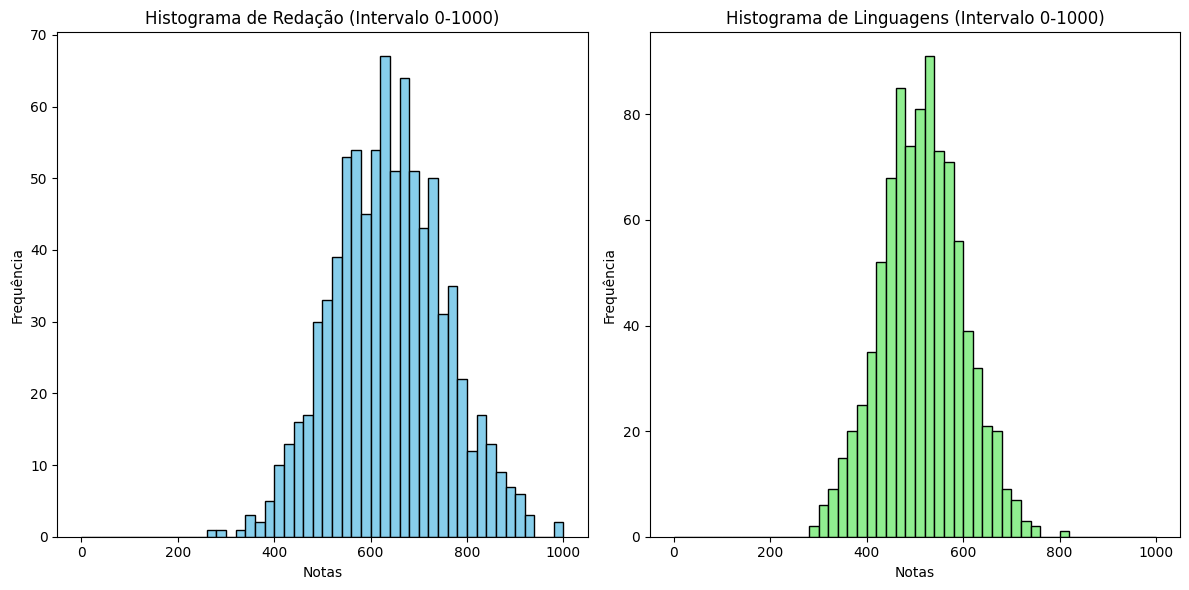

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Redação'].dropna(), bins=range(0, 1001, 20), edgecolor='black', color='skyblue', range=(0, 1000))
plt.title('Histograma de Redação (Intervalo 0-1000)')
plt.xlabel('Notas')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(df['Linguagens'].dropna(), bins=range(0, 1001, 20), edgecolor='black', color='lightgreen', range=(0, 1000))
plt.title('Histograma de Linguagens (Intervalo 0-1000)')
plt.xlabel('Notas')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [ ]:
skew_redacao = stats.skew(df['Redação'].dropna())
skew_linguagens = stats.skew(df['Linguagens'].dropna())

print(f'Assimetria de Redação: {skew_redacao:.2f}')
print(f'Assimetria de Linguagens: {skew_linguagens:.2f}')

Assimetria de Redação: 0.07
Assimetria de Linguagens: 0.08


#8

Faça um boxplot para as notas de Ciências da Natureza e Redação,
analisando os quartis e identificando possíveis outliers. Utilize o método
IQR (Intervalo Interquartílico) para essa análise.

Ciências da Natureza - IQR: 104.04260217492504
Limites para outliers - Inferior: 288.6451729556874, Superior: 704.8155816553876
Redação - IQR: 159.52150290787495
Limites para outliers - Inferior: 317.1861111976376, Superior: 955.2721228291374


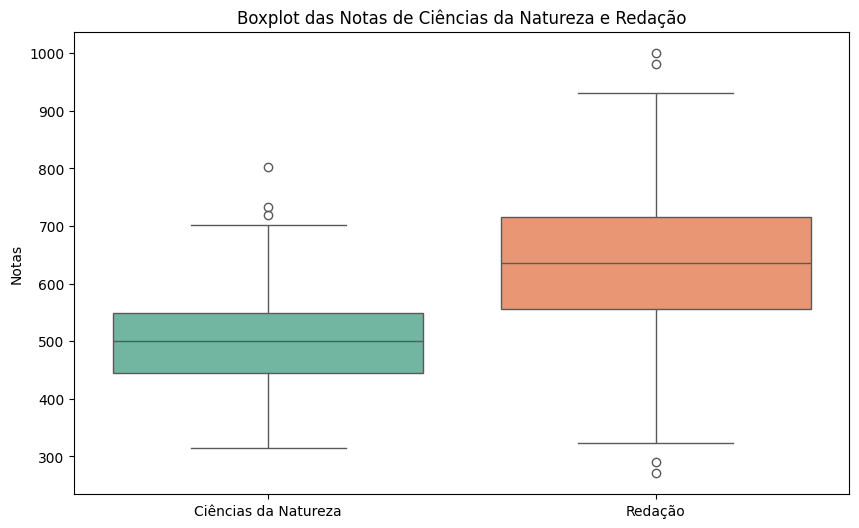

In [ ]:
q1_natureza = df['Ciências da natureza'].quantile(0.25)
q3_natureza = df['Ciências da natureza'].quantile(0.75)
iqr_natureza = q3_natureza - q1_natureza
limite_inferior_natureza = q1_natureza - 1.5 * iqr_natureza
limite_superior_natureza = q3_natureza + 1.5 * iqr_natureza

q1_redacao = df['Redação'].quantile(0.25)
q3_redacao = df['Redação'].quantile(0.75)
iqr_redacao = q3_redacao - q1_redacao
limite_inferior_redacao = q1_redacao - 1.5 * iqr_redacao
limite_superior_redacao = q3_redacao + 1.5 * iqr_redacao

print("Ciências da Natureza - IQR:", iqr_natureza)
print(f"Limites para outliers - Inferior: {limite_inferior_natureza}, Superior: {limite_superior_natureza}")
print("Redação - IQR:", iqr_redacao)
print(f"Limites para outliers - Inferior: {limite_inferior_redacao}, Superior: {limite_superior_redacao}")

plt.figure(figsize=(10, 6))

sns.boxplot(data=[df['Ciências da natureza'].dropna(), df['Redação'].dropna()], palette="Set2")

plt.xticks([0, 1], ['Ciências da Natureza', 'Redação'])

plt.title('Boxplot das Notas de Ciências da Natureza e Redação')
plt.ylabel('Notas')

plt.show()

#9

Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente. (Considere significativamente um valor
acima de 5%)

In [ ]:
df_sem_outliers_natureza = df[(df['Ciências da natureza'] >= limite_inferior_natureza) &
                               (df['Ciências da natureza'] <= limite_superior_natureza)]

df_sem_outliers_redacao = df[(df['Redação'] >= limite_inferior_redacao) &
                             (df['Redação'] <= limite_superior_redacao)]

media_natureza_original = df['Ciências da natureza'].mean()
media_redacao_original = df['Redação'].mean()

media_natureza_sem_outliers = df_sem_outliers_natureza['Ciências da natureza'].mean()
media_redacao_sem_outliers = df_sem_outliers_redacao['Redação'].mean()

dif_natureza = abs(media_natureza_original - media_natureza_sem_outliers) / media_natureza_original * 100
dif_redacao = abs(media_redacao_original - media_redacao_sem_outliers) / media_redacao_original * 100

print(f'Média original de Ciências da Natureza: {media_natureza_original:.2f}')
print(f'Média sem outliers de Ciências da Natureza: {media_natureza_sem_outliers:.2f}')
print(f'Diferença percentual em Ciências da Natureza: {dif_natureza:.2f}%')

print(f'Média original de Redação: {media_redacao_original:.2f}')
print(f'Média sem outliers de Redação: {media_redacao_sem_outliers:.2f}')
print(f'Diferença percentual em Redação: {dif_redacao:.2f}%')

if dif_natureza > 5:
    print("A remoção dos outliers em Ciências da Natureza alterou significativamente a média.")
else:
    print("A remoção dos outliers em Ciências da Natureza não alterou significativamente a média.")

if dif_redacao > 5:
    print("A remoção dos outliers em Redação alterou significativamente a média.")
else:
    print("A remoção dos outliers em Redação não alterou significativamente a média.")

Média original de Ciências da Natureza: 499.32
Média sem outliers de Ciências da Natureza: 498.40
Diferença percentual em Ciências da Natureza: 0.18%
Média original de Redação: 637.78
Média sem outliers de Redação: 637.79
Diferença percentual em Redação: 0.00%
A remoção dos outliers em Ciências da Natureza não alterou significativamente a média.
A remoção dos outliers em Redação não alterou significativamente a média.


#10

Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou mediana?
Substitua o valor por todos os três e diga qual delas altera menos a média
geral e o desvio padrão.

In [ ]:
def calcular_metricas(df, coluna, valor_substituto):
    df_copy = df.copy()
    df_copy[coluna] = df_copy[coluna].fillna(valor_substituto)
    return df_copy[coluna].mean(), df_copy[coluna].std()

medidas = {
    'Ciências da natureza': {
        'média': df['Ciências da natureza'].mean(),
        'mediana': df['Ciências da natureza'].median(),
        'moda': df['Ciências da natureza'].mode()[0]
    },
    'Redação': {
        'média': df['Redação'].mean(),
        'mediana': df['Redação'].median(),
        'moda': df['Redação'].mode()[0]
    }
}

def calc_diff(original, novo):
    return abs(original - novo) / original * 100

resultados_antes = {
    'Ciências da natureza': {
        'média': df['Ciências da natureza'].mean(),
        'desvio': df['Ciências da natureza'].std()
    },
    'Redação': {
        'média': df['Redação'].mean(),
        'desvio': df['Redação'].std()
    }
}

resultados_depois = {}
for disciplina, valores in medidas.items():
    resultados_depois[disciplina] = {}
    for metodo, valor_substituto in valores.items():
        media, desvio = calcular_metricas(df, disciplina, valor_substituto)
        resultados_depois[disciplina][metodo] = {
            'media': media,
            'desvio': desvio,
            'diff_media': calc_diff(resultados_antes[disciplina]['média'], media),
            'diff_desvio': calc_diff(resultados_antes[disciplina]['desvio'], desvio)
        }

for disciplina in resultados_depois:
    print(f"\n{disciplina}:")
    print(f"Antes da substituição - Média: {resultados_antes[disciplina]['média']:.2f}, Desvio: {resultados_antes[disciplina]['desvio']:.2f}")
    for metodo, res in resultados_depois[disciplina].items():
        print(f"  Após substituição por {metodo.capitalize()} - Média: {res['media']:.2f}, Desvio: {res['desvio']:.2f}")
        print(f"  Diferença percentual - Média: {res['diff_media']:.2f}%, Desvio: {res['diff_desvio']:.2f}%")


Ciências da natureza:
Antes da substituição - Média: 499.32, Desvio: 78.76
  Após substituição por Média - Média: 499.32, Desvio: 71.49
  Diferença percentual - Média: 0.00%, Desvio: 9.24%
  Após substituição por Mediana - Média: 499.52, Desvio: 71.49
  Diferença percentual - Média: 0.04%, Desvio: 9.23%
  Após substituição por Moda - Média: 466.77, Desvio: 100.37
  Diferença percentual - Média: 6.52%, Desvio: 27.44%

Redação:
Antes da substituição - Média: 637.78, Desvio: 115.34
  Após substituição por Média - Média: 637.78, Desvio: 106.95
  Diferença percentual - Média: 0.00%, Desvio: 7.27%
  Após substituição por Mediana - Média: 637.43, Desvio: 106.96
  Diferença percentual - Média: 0.06%, Desvio: 7.27%
  Após substituição por Moda - Média: 586.41, Desvio: 166.33
  Diferença percentual - Média: 8.05%, Desvio: 44.21%
